<a href="https://colab.research.google.com/github/HuiningLiu02/TIF360-Advanced-machine-learning-with-neural-networks/blob/main/Ch03_CNN/hw/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying mnist with a Convolutional Neural Network



In [1]:
!pip install deeplay  # Uncomment if using Colab/Kaggle.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.3/177.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

This notebook provides you with a complete code example that loads the malaria dataset, trains a convolutional neural network with dense top to classify the images of cells with and without malaria, analyzes where the trained network fails, and shows the network activations and heatmaps.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 3-A from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Loading the MNIST Dataset

In [2]:
import os

if not os.path.exists("MNIST_dataset"):
    os.system("git clone https://github.com/DeepTrackAI/MNIST_dataset")

train_path = os.path.join("MNIST_dataset", "mnist", "train")
train_image_files = sorted(os.listdir(train_path))

In [3]:
import matplotlib.pyplot as plt
import deeplay as dl
import torch

train_path = os.path.join("MNIST_dataset", "mnist", "train")
train_image_files = sorted(os.listdir(train_path))

train_images = []
for file in train_image_files:
    image = plt.imread(os.path.join(train_path, file))
    image = torch.tensor(image).unsqueeze(0)
    train_images.append(image)


train_digits = []
for file in train_image_files:
    filename = os.path.basename(file)
    digit = int(filename[0])
    digit_one_hot = torch.nn.functional.one_hot(torch.tensor(digit), num_classes=10).float()
    train_digits.append(digit_one_hot)



In [4]:
# check the size of the elements
print(train_images[0].shape)
print(train_digits[0].shape)

torch.Size([1, 28, 28])
torch.Size([10])


In [5]:
#get the dataloader of the train data
train_images_digits = list(zip(train_images, train_digits))
train_dataloader = dl.DataLoader(train_images_digits, batch_size=32, shuffle=True)

In [6]:
# **test DataLoader**
images, labels = next(iter(train_dataloader))
print("Image tensor shape:", images.shape)
print("Label tensor shape:", labels.shape)

Image tensor shape: torch.Size([32, 1, 28, 28])
Label tensor shape: torch.Size([32, 10])


In [7]:
test_path = os.path.join("MNIST_dataset", "mnist", "test")
test_image_files = sorted(os.listdir(test_path))

test_images = []
for file in test_image_files:
    image = plt.imread(os.path.join(test_path, file))
    image = torch.tensor(image).unsqueeze(0)
    test_images.append(image)

test_digits = []
for file in test_image_files:
    filename = os.path.basename(file)
    digit = int(filename[0])
    digit_one_hot = torch.nn.functional.one_hot(torch.tensor(digit), num_classes=10).float()
    test_digits.append(digit_one_hot)



In [8]:
test_images_digits = list(zip(test_images, test_digits))
test_dataloader = dl.DataLoader(test_images_digits, batch_size=256, shuffle=False)

In [9]:
images, labels = next(iter(test_dataloader))
print("Image tensor shape:", images.shape)  # (32, 28, 28) 或 (32, 1, 28, 28)
print("Label tensor shape:", labels.shape)  # (32, 10)

Image tensor shape: torch.Size([256, 1, 28, 28])
Label tensor shape: torch.Size([256, 10])


In [96]:
print(len(test_digits))

10000


### Visualizing the data



In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_digits(dataset):
    """Plot images digits"""
    fig, axs = plt.subplots(3, 6, figsize=(16, 8))
    for ax in axs.ravel():
        image, label = dataset[np.random.randint(0, len(dataset))]
        if isinstance(image, torch.Tensor):
            image, label = image.numpy().transpose(1, 2, 0), torch.argmax(label).item()
        ax.imshow(image)
        ax.set_title(f"Label: {label}", fontsize=20)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

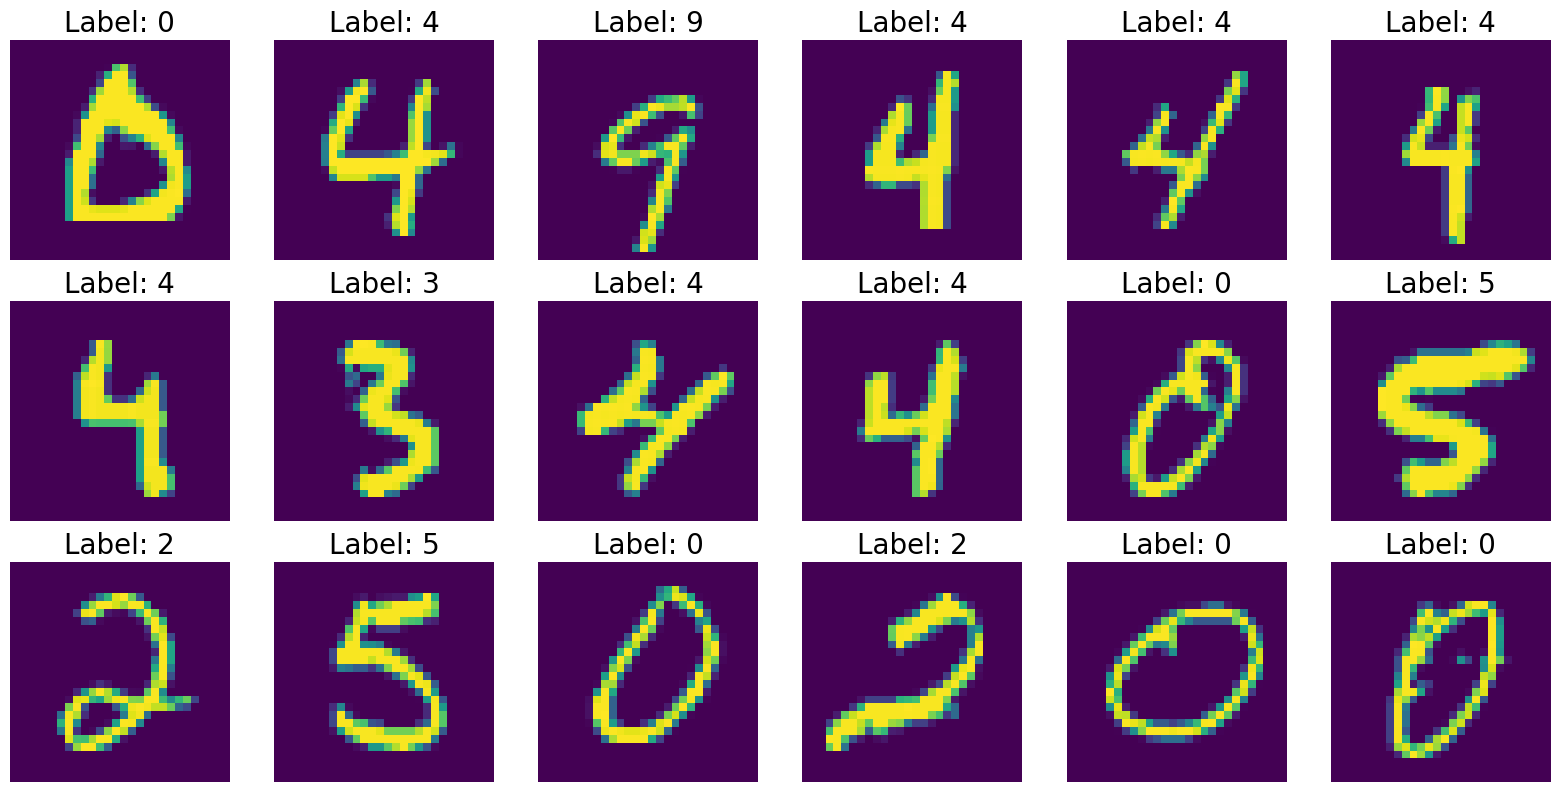

In [11]:
plot_images_digits(train_images_digits)

## Classifying the MNIST with Convolutional Neural Networks

Implement a convolutional neural network with a dense top ...

In [33]:
conv_base = dl.ConvolutionalNeuralNetwork(
    in_channels=1, hidden_channels=[16, 16, 32], out_channels=32,
)
conv_base.blocks[2].pool.configure(torch.nn.MaxPool2d, kernel_size=2)

connector = dl.Layer(torch.nn.AdaptiveAvgPool2d, output_size=1)

dense_top = dl.MultiLayerPerceptron(
    in_features=32, hidden_features=[], out_features=10, #change the out_features into 10
    out_activation=torch.nn.Softmax(dim=1) #Change the Softmax activation
)

cnn = dl.Sequential(conv_base, connector, dense_top)

... print out its detailed architecture ...

In [34]:
print(cnn)

Sequential(
  (0): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (2): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (3): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[Identity]()
      )
    )
  )
  (1): Layer[AdaptiveAvgPool2d](output_size=1)
  (2): MultiLayerPerceptron(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=10, bias=T

... compile it ...

In [63]:
from torch.nn import CrossEntropyLoss
cnn_classifier = dl.Classifier(
    model=cnn, optimizer=dl.RMSprop(lr=0.001), loss=CrossEntropyLoss(), num_classes=10,
).create()

... and print out the compiled convolutional neural network.

In [64]:
print(cnn_classifier)

Classifier(
  (loss): CrossEntropyLoss()
  (optimizer): RMSprop[RMSprop](lr=0.001)
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=test
  )
  (model): Sequential(
    (0): ConvolutionalNeuralNetwork(
      (blocks): LayerList(
        (0): Conv2dBlock(
          (layer): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
        (1): Conv2dBlock(
          (layer): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
        (2): Conv2dBlock(
          (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
          (layer): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (

### Training the Convolutional Neural Network

In [65]:
cnn_trainer = dl.Trainer(max_epochs=5, accelerator="auto")
cnn_trainer.fit(cnn_classifier, train_dataloader)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: 
  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | loss          | CrossEntropyLoss | 0      | train
1 | train_metrics | MetricCollection | 0      | train
2 | val_metrics   | MetricCollection | 0      | train
3 | test_metrics  | MetricCollection | 0      | train
4 | model         | Sequential       | 16.7 K | train
5 | optimizer     | RMSprop          | 0      | train
-----------------------------------------------------------
16.7 K    Trainable params
0         Non-trainable params
16.7 K    Total params
0.067     Total estimated model params size (MB)
30        Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name          | Type             | Params | Mode 
----------------------

Training: |          | 0/? [00:00<?, ?it/s]

### Testing the Convolutional Neural Network

In [66]:
cnn_trainer.test(cnn_classifier, test_dataloader)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃         Test metric          ┃         DataLoader 0         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ testMulticlassAccuracy_epoch │     0.05033000186085701      │
│       test_loss_epoch        │      1.5180641412734985      │
└──────────────────────────────┴──────────────────────────────┘

[{'test_loss_epoch': 1.5180641412734985,
  'testMulticlassAccuracy_epoch': 0.05033000186085701}]

### Plotting the Confusion Matrix

In [67]:
from seaborn import cubehelix_palette, heatmap

def plot_confusion_matrix(classifier, dataloader):
    """Plot confusion matrix."""
    confusion_matrix = np.zeros((10, 10), dtype=int)
    for image, gt_digit in dataloader:
        predictions = classifier(image)
        max_prediction, pred_digit = predictions.max(dim=1)
        gt_digit = gt_digit.argmax(dim=1)
        np.add.at(confusion_matrix, (gt_digit, pred_digit), 1)

    plt.figure(figsize=(10, 8))
    heatmap(confusion_matrix, annot=True, fmt=".0f", square=True,
            cmap=cubehelix_palette(light=0.95, as_cmap=True), vmax=150)
    plt.xlabel("Predicted digit", fontsize=15)
    plt.ylabel("Ground truth digit", fontsize=15)
    plt.show()

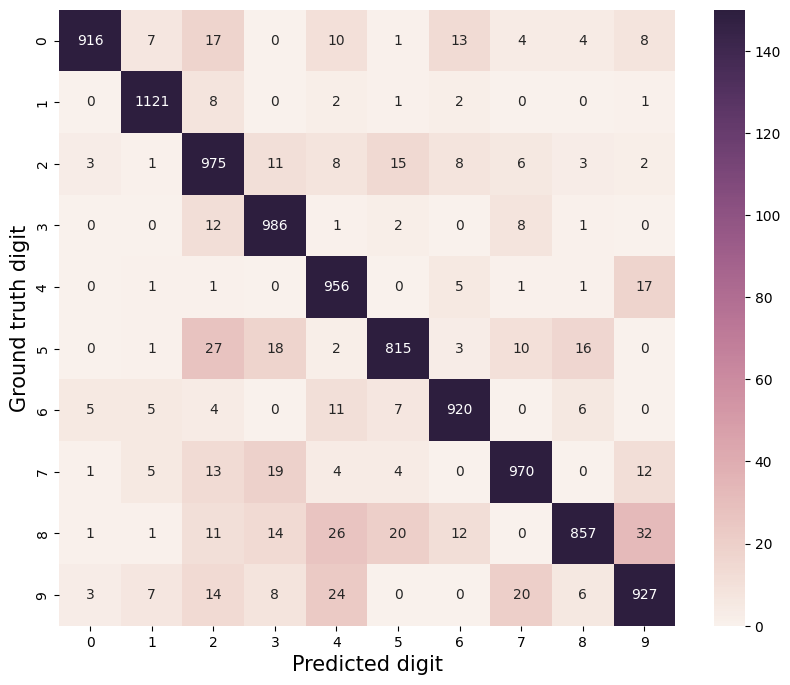

In [68]:
plot_confusion_matrix(cnn_classifier, test_dataloader)

### Plotting the ROC Curve

In [71]:
import torchmetrics as tm

def plot_roc(classifier, loader):
    """Plot ROC curve."""
    roc = tm.ROC(num_classes=10, task="multiclass")
    for image, label in loader:
        label = label.argmax(dim=1)
        roc.update(classifier(image), label)

    fig, ax = roc.plot(score=True)
    ax.grid(False)
    ax.axis("square")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(loc="center right")
    plt.show()

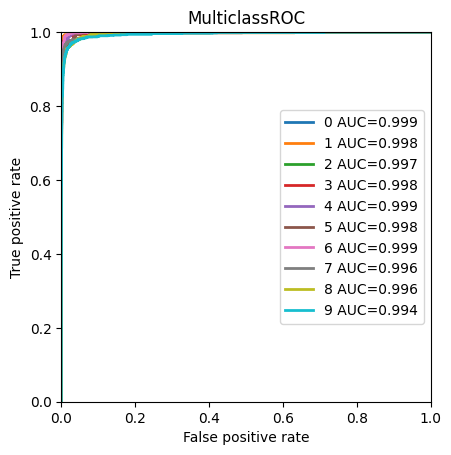

In [72]:
plot_roc(cnn_classifier, test_dataloader)

### Checking the Values of the Filters

The following code accesses the 32nd filter's weights in the first convolutional layer of the CNN. It navigates through the model's first module (`model[0]`), selects the initial block (`blocks[0]`), and then targets the layer's weights (`layer.weight[15]`).

In [73]:
filter = cnn_classifier.model[0].blocks[0].layer.weight[15]

print(filter)

tensor([[[-0.0283, -0.0448, -0.1942],
         [ 0.1316,  0.4626,  0.8573],
         [ 0.7681,  0.9619,  0.7926]]], grad_fn=<SelectBackward0>)


### Visualizing the Activations of the Convolutional Layers

Pick the image of an infected smear to then check the activations it produces on the last convolutional layer ...

In [83]:
#from PIL import Image

im_ind = 0
image = test_images_digits[im_ind][0]


... verify whether the digit of this image is 0 ...

In [84]:
print(test_images_digits[im_ind][1])

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


... define a function to visualize the activations ...

In [85]:
def plot_activations(activations, cols=8):
    """Visualize activations."""
    rows = -(activations.shape[0] // -cols)

    fig, axs = plt.subplots(rows, cols, figsize=(2 * cols, 2 * rows))
    for i, ax in enumerate(axs.ravel()):
        ax.axis("off")
        if i < activations.shape[0]:
            ax.imshow(activations[i].numpy())
            ax.set_title(i, fontsize=16)
    plt.show()

... add a hook to access the activations in the forward pass ...


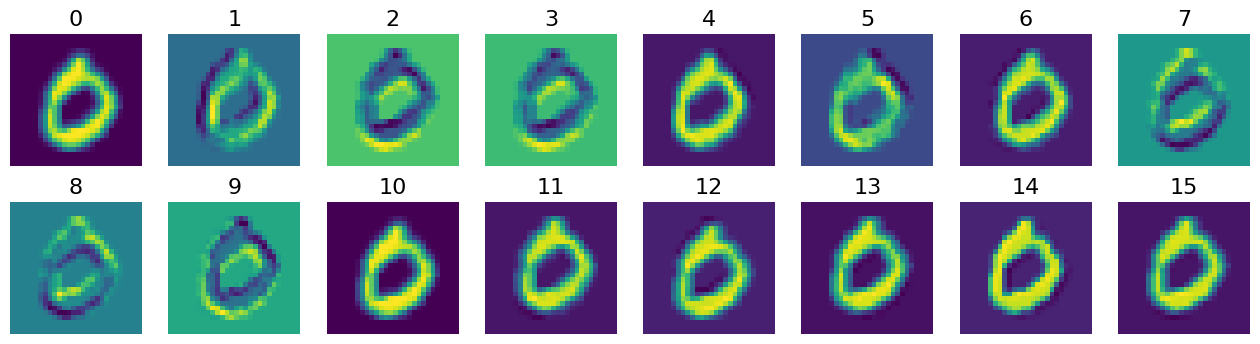

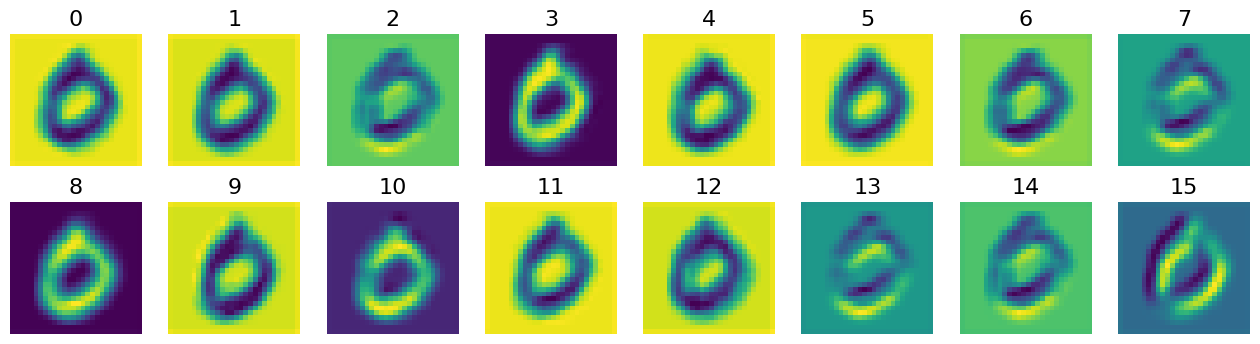

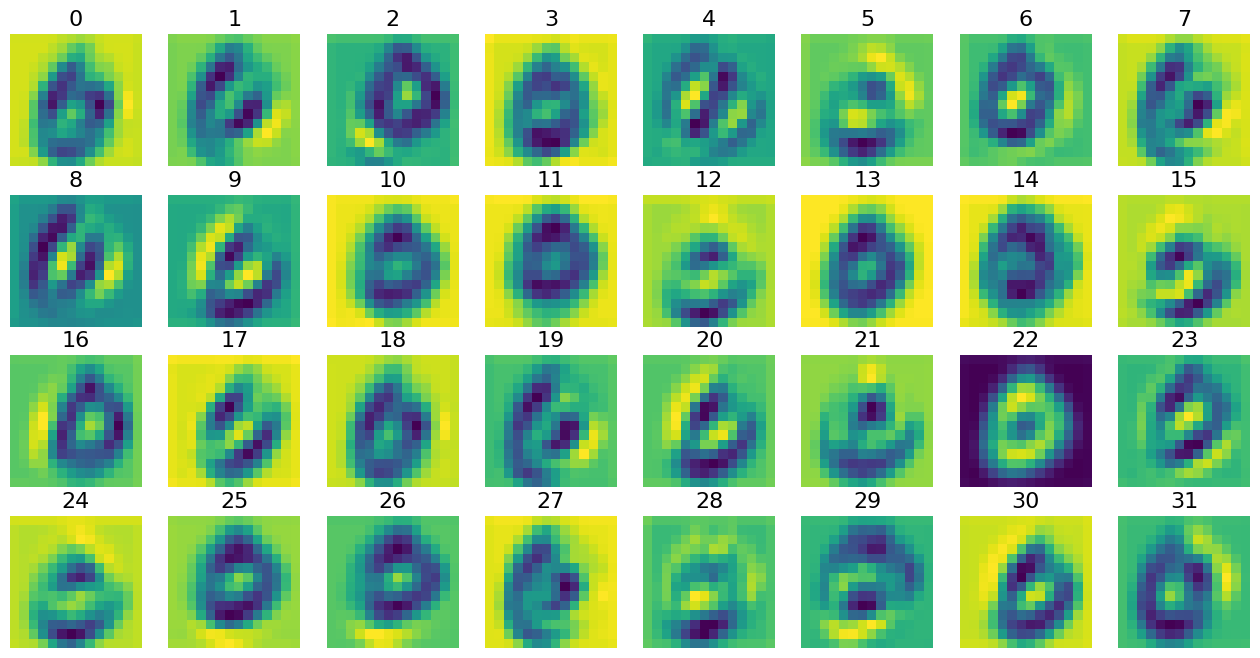

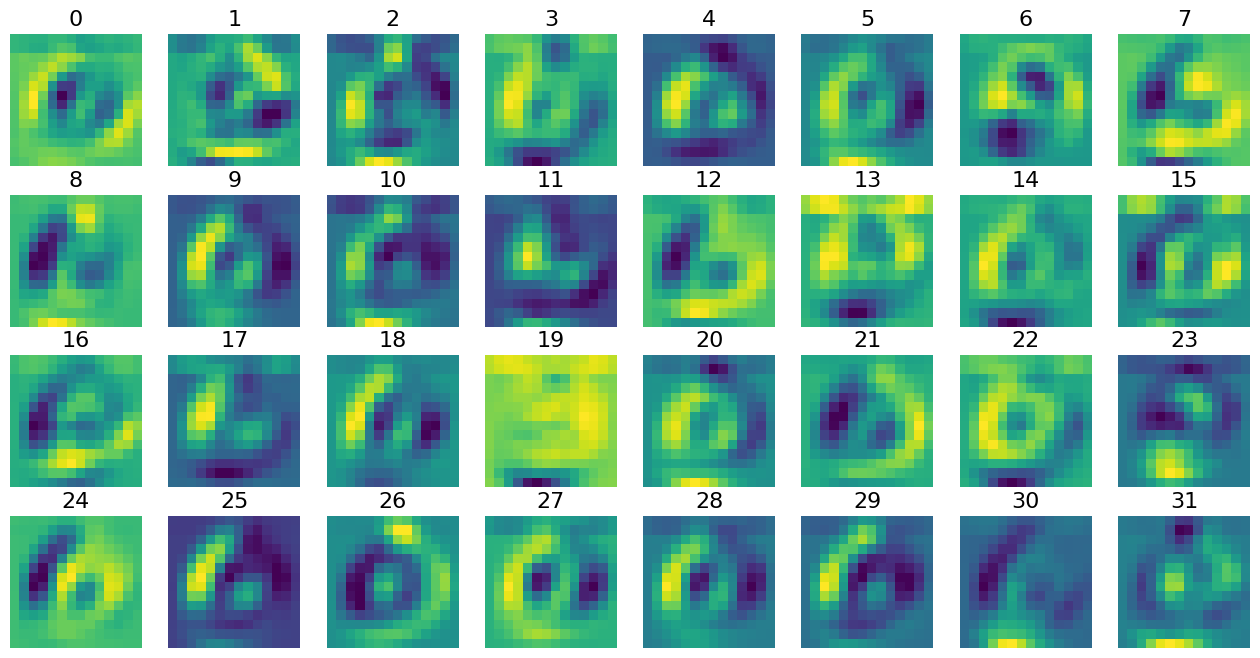

In [86]:
def hook_func(layer, input, output):
    """Hook for activations."""
    activations = output.detach().clone()
    plot_activations(activations[0])

for block in cnn_classifier.model[0].blocks:
    layer = block.layer
    handle_hook = layer.register_forward_hook(hook_func)

    try:
        pred = cnn_classifier.model(image.unsqueeze(0))
    except Exception as e:
        print(f"An error occurred during model prediction: {e}")
    finally:
        handle_hook.remove()

In [87]:
pred = cnn_classifier.model(image.unsqueeze(0))
print(pred)

tensor([[1.0000e+00, 1.7529e-10, 2.2272e-11, 1.5414e-44, 4.4445e-07, 1.2073e-17,
         6.5109e-07, 3.7533e-20, 2.5193e-14, 2.8847e-10]],
       grad_fn=<SoftmaxBackward0>)


### Visualizing the Heatmaps

Use hooks to keep tracks also of the gradients in the backward pass ...

In [88]:
hookdata = {}

def fwd_hook_func(layer, input, output):
    """Forward hook function."""
    hookdata["activations"] = output.detach().clone()

def bwd_hook_func(layer, grad_input, grad_output):
    """Backward hook function."""
    hookdata["gradients"] = grad_output[0].detach().clone()

layer = cnn_classifier.model[0].blocks[3].layer
handle_fwd_hook = layer.register_forward_hook(fwd_hook_func)
handle_bwd_hook = layer.register_full_backward_hook(bwd_hook_func)

try:
    #find the target score for class 0
    pred = cnn_classifier.model(image.unsqueeze(0))
    class_idx = 0
    target_score = pred[:, class_idx]

    cnn_classifier.model.zero_grad()
    target_score.backward()  # backpropagate class 0
except Exception as e:
    print(f"An error occurred during model prediction: {e}")
finally:
    handle_fwd_hook.remove()
    handle_bwd_hook.remove()


... calculate the heatmap combining activations and gradients ...

In [89]:
from torch.nn.functional import relu

activations = hookdata["activations"][0]
gradients = hookdata["gradients"][0]

pooled_gradients = gradients.mean(dim=[1, 2], keepdim=True)
heatmap = relu((pooled_gradients * activations).sum(0)).detach().numpy()

... and plot the heatmap.

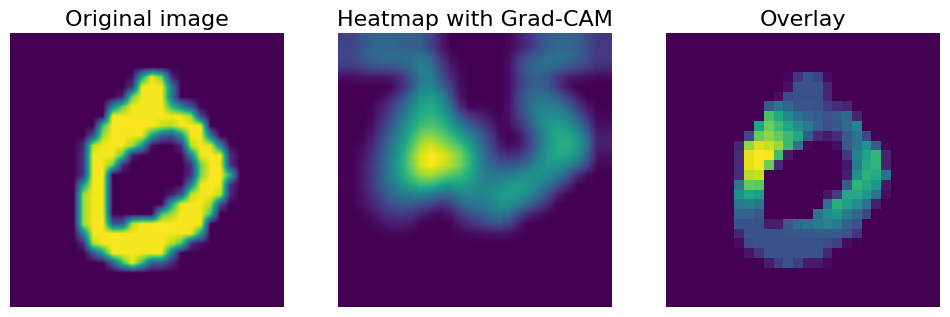

In [90]:
from numpy import array
from skimage.exposure import rescale_intensity
from skimage.transform import resize

rescaled_image = rescale_intensity(array(image.numpy().transpose(1, 2, 0)), out_range=(0, 1))
resized_heatmap = resize(heatmap, rescaled_image.shape, order=2)
rescaled_heatmap = rescale_intensity(resized_heatmap, out_range=(0.25, 1))

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(rescaled_image, interpolation="bilinear")
plt.title("Original image", fontsize=16)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(rescaled_heatmap.mean(axis=-1), interpolation="bilinear")
plt.title("Heatmap with Grad-CAM", fontsize=16)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(rescaled_image * rescaled_heatmap)
plt.title("Overlay", fontsize=16)
plt.axis("off")

plt.show()

In [91]:
def generate_gradcam(image, class_idx, model, target_layer):
    """
    计算并可视化指定类别的 Grad-CAM 热力图

    参数:
    - image: torch.Tensor，形状为 (1, H, W)
    - class_idx: int，目标类别索引
    - model: 训练好的 CNN 分类器
    - target_layer: 需要 hook 的卷积层

    输出:
    - 显示原图、Grad-CAM 热力图、叠加后的图像
    """

    # 存储激活值 & 梯度
    hookdata = {}

    def fwd_hook_func(layer, input, output):
        hookdata["activations"] = output.detach().clone()

    def bwd_hook_func(layer, grad_input, grad_output):
        hookdata["gradients"] = grad_output[0].detach().clone()

    # 注册 hooks
    handle_fwd_hook = target_layer.register_forward_hook(fwd_hook_func)
    handle_bwd_hook = target_layer.register_full_backward_hook(bwd_hook_func)

    try:
        # 前向传播
        pred = model(image.unsqueeze(0))  # 形状: (1, num_classes)

        # 计算目标类别的梯度
        model.zero_grad()  # 清空梯度
        target_score = pred[:, class_idx]  # 选择类别 class_idx 的分数
        target_score.backward()  # 计算梯度

        # 获取 activations 和 gradients
        activations = hookdata["activations"][0]  # (num_filters, H, W)
        gradients = hookdata["gradients"][0]  # (num_filters, H, W)

        # 计算 Grad-CAM heatmap
        pooled_gradients = gradients.mean(dim=[1, 2], keepdim=True)  # (num_filters, 1, 1)
        heatmap = relu((pooled_gradients * activations).sum(0)).detach().numpy()  # (H, W)

    except Exception as e:
        print(f"An error occurred during model prediction: {e}")
        return

    finally:
        handle_fwd_hook.remove()
        handle_bwd_hook.remove()

    # 处理原始图片
    rescaled_image = rescale_intensity(array(image.numpy().transpose(1, 2, 0)), out_range=(0, 1))
    resized_heatmap = resize(heatmap, rescaled_image.shape[:2], order=2)
    rescaled_heatmap = rescale_intensity(resized_heatmap, out_range=(0.25, 1))

    # 显示 Grad-CAM 结果
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(rescaled_image, interpolation="bilinear")
    plt.title("Original Image", fontsize=16)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(rescaled_heatmap, cmap="jet", alpha=0.7, interpolation="bilinear")
    plt.title(f"Grad-CAM (Class {class_idx})", fontsize=16)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(rescaled_image)
    plt.imshow(rescaled_heatmap, cmap="jet", alpha=0.5, interpolation="bilinear")
    plt.title("Overlay", fontsize=16)
    plt.axis("off")

    plt.show()

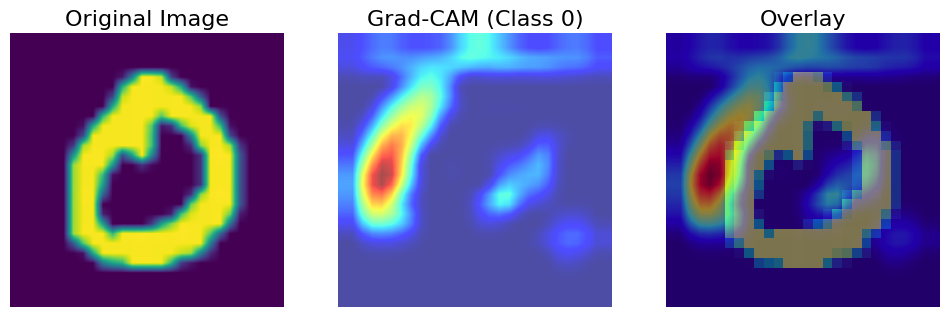

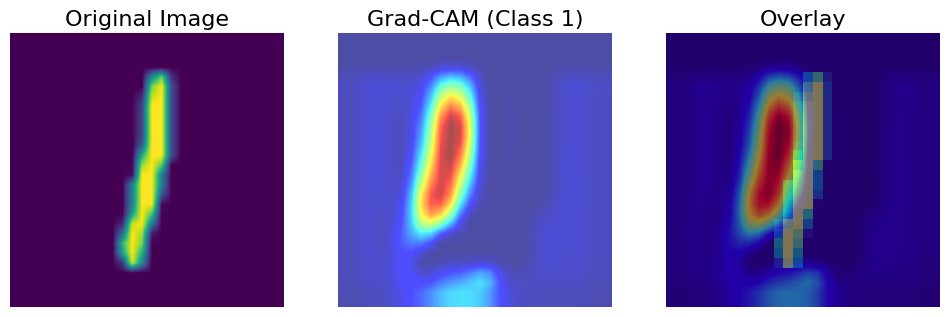

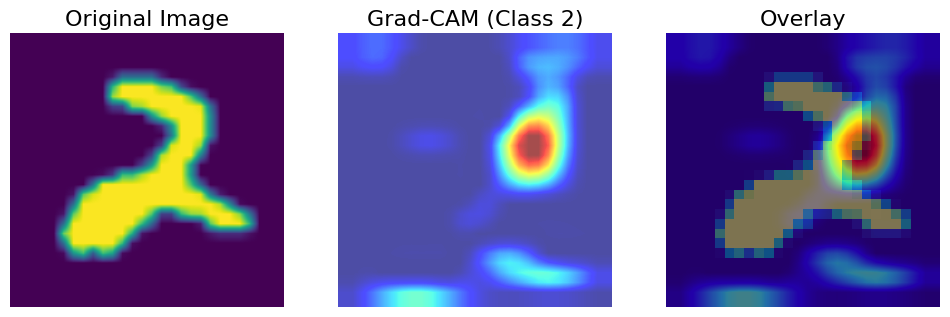

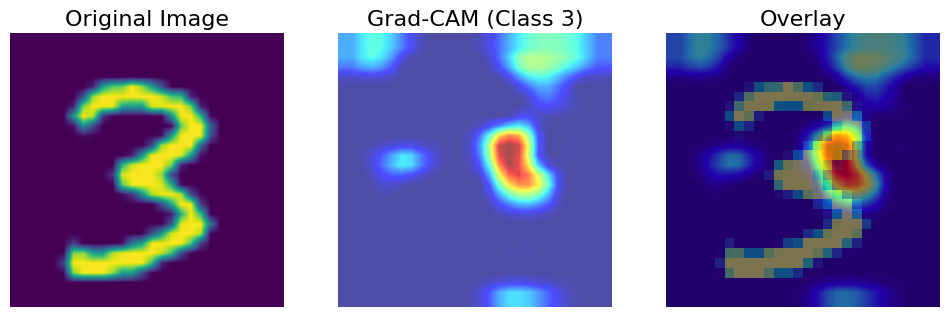

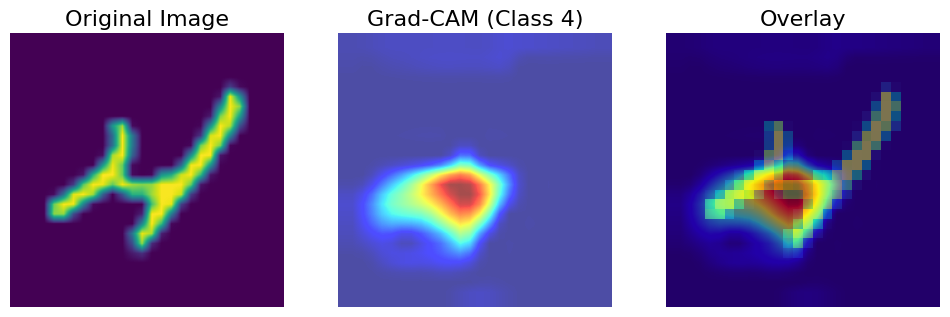

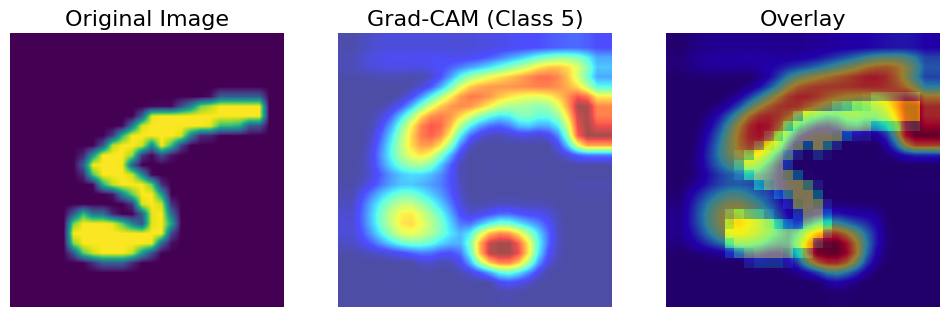

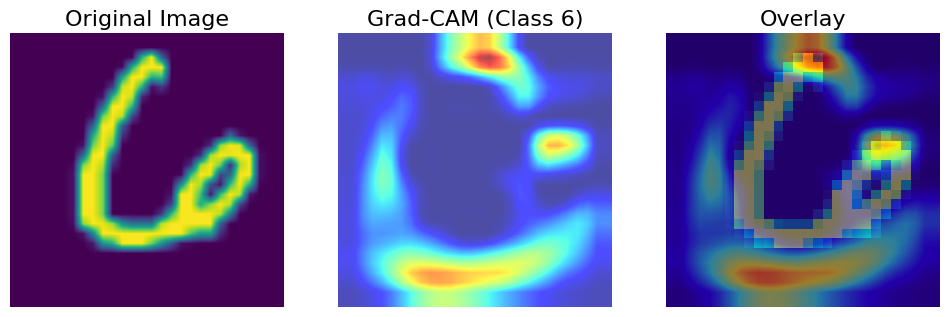

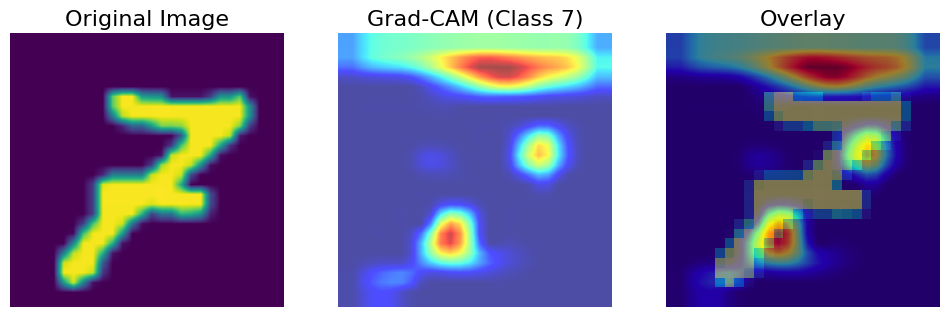

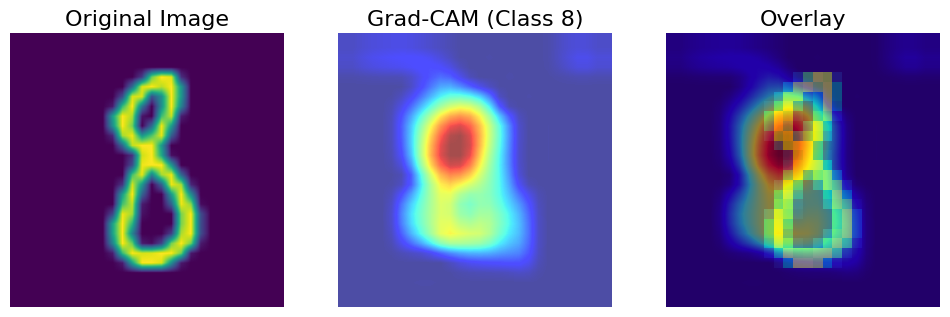

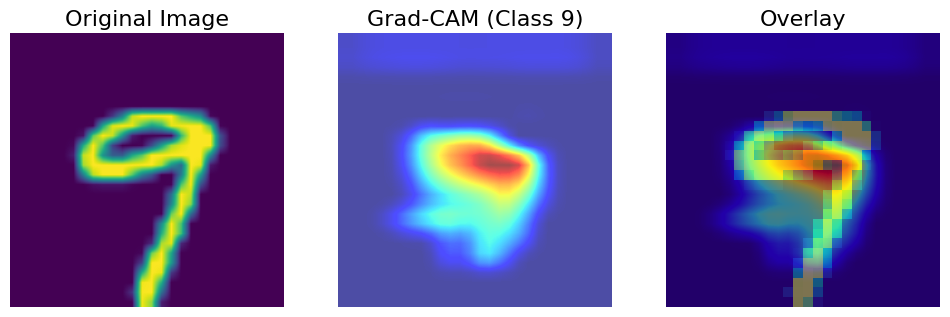

In [101]:
target_layer = cnn_classifier.model[0].blocks[3].layer

# 选取测试图片
im_ind = [100, 1100, 3100, 4100, 5100, 5600, 6100, 7100, 8100, 9100]
#image = train_images_digits[im_ind][0]  # (1, H, W)

for ind in im_ind:
  image = test_images_digits[ind][0]
  class_idx = torch.argmax(test_images_digits[ind][1]).item()
  generate_gradcam(image, class_idx=class_idx, model=cnn_classifier, target_layer=target_layer)